In [16]:
import glob

# data/plot management
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# plotting/mapmaknig
import geopandas as gpd
import folium

In [8]:
glob.glob("*.txt")

['BLACK VOLTA, VONKORO.txt',
 'BOUGOURIBA, DAN.txt',
 'dayfile.txt',
 'discharge_combined_adjusted.txt',
 'MOU HOUN, BLACK VOLTA, SAMANDENI.txt',
 'MOU HOUN, BLACK VOLTA,DAPOLA.txt',
 'NAKANBE, WHITE VOLTA, YAKALA.txt',
 'NAKANBE, WHITE VOLTA, YILOU.txt',
 'NAZINON, RED VOLTA, DAKAYE.txt',
 'PENDJARI, PORGA.txt',
 'SINGOU, SAMBOALI.txt',
 'volt_day.txt']

In [9]:
links = ["https://goo.gl/maps/B6rpdv8nrVrWcMGY9",
         "https://goo.gl/maps/k2Hn8jJ3aM2FLVfMA",
         'https://goo.gl/maps/GqkaLwHdsxNS8VQr7',
         "https://goo.gl/maps/bnRr46YB6gbaX7VV9",
         "https://goo.gl/maps/ymWchRtzaiqa3oqBA",
         "https://goo.gl/maps/cCHzihPvBMnuwokY8",
         "https://goo.gl/maps/9HoAGcJncrnZwyXs5",
         "https://goo.gl/maps/G1ZCWiA575tm8qUP8",
         "https://goo.gl/maps/NRH7s4NNWT2E3uvS6"
        ]

lat_lon = [[9.171205333996518, -2.7448412667392383],
           [10.867875919446051, -3.722479273356632],
           [11.458715461275865, -4.469476596583681],
           [10.572861584223373, -2.914134892035999],
           [11.344607777805557, -0.5289654226974667],
           [12.99971043752888, -1.570603458131631],
           [11.777456003610485, -1.6001563849044829],
           [11.045433053420533, 0.959913528639681],
           [11.279536764583742, 1.0158889285854777]        
         ]

In [10]:
locations = ['BLACK VOLTA, VONKORO.txt',
             'BOUGOURIBA, DAN.txt',
             'MOU HOUN, BLACK VOLTA, SAMANDENI.txt',
             'MOU HOUN, BLACK VOLTA,DAPOLA.txt',
             'NAKANBE, WHITE VOLTA, YAKALA.txt',
             'NAKANBE, WHITE VOLTA, YILOU.txt',
             'NAZINON, RED VOLTA, DAKAYE.txt',
             'PENDJARI, PORGA.txt',
             'SINGOU, SAMBOALI.txt']

In [14]:
df_per_location_lst = []
for i in range(len(locations)):
    df = pd.read_csv(locations[i], delimiter=",")
    df['n_month_row'] = df.apply(lambda x: str(x.date).strip()[0],axis=1)
    df['year'] = df.apply(lambda x: str(x.date).strip()[1:].strip()[-4:],axis=1)
    df['month'] = df.apply(lambda x: str(x.date).strip()[1:].strip()[:-4],axis=1)
    df.index.name = locations[i][:-4]
    df = df.drop(columns="date")

    df_lst = []
    for month_index in np.arange(0, len(df),3):

        month = df[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']].iloc[month_index:month_index+3]\
                                                                         .astype(float).to_numpy()
        new_month_data = month.flatten()[~np.in1d(month.flatten(), np.array(9999))] 
        dates = []
        for day in range(1,len(new_month_data)+1):
            date_string = f'{df.iloc[month_index].year}-{df.iloc[month_index].month}-{day}'
#             print(date_string,end=" ")
            dates.append(pd.Timestamp(date_string))
        new_month = pd.DataFrame(index=dates, data=new_month_data, columns=[f'{str(locations[i][:-4]).lower()}'])
        df_lst.append(new_month)

    df_per_location_lst.append(pd.concat(df_lst))

# remove unrealistic data
df_per_location_lst[-2] = df_per_location_lst[-2][df_per_location_lst[-2] < 1e6]

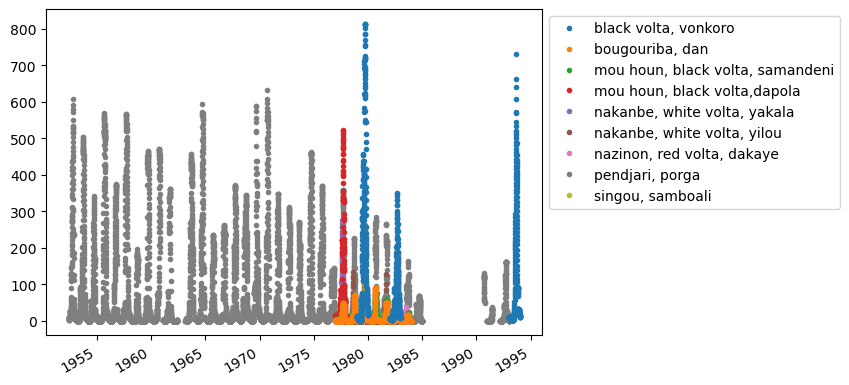

In [15]:
fig, ax = plt.subplots(1)
for i in range(len(locations)):
    df_per_location_lst[i].plot(marker='.',lw=0,color=f"C{i}",ax=ax,zorder=10-i)
ax.legend(bbox_to_anchor=(1,1))

array([ 9.17120533, 10.86787592, 11.45871546, 10.57286158, 11.34460778,
       12.99971044, 11.777456  , 11.04543305, 11.27953676])

In [30]:
df = pd.DataFrame(columns= ["name","lat", "lon"], data=list(zip(locations,np.array(lat_lon)[:,0],np.array(lat_lon)[:,1])))

In [31]:
df

,name,lat,lon
0,"BLACK VOLTA, VONKORO.txt",9.171205,-2.744841
1,"BOUGOURIBA, DAN.txt",10.867876,-3.722479
2,"MOU HOUN, BLACK VOLTA, SAMANDENI.txt",11.458715,-4.469477
3,"MOU HOUN, BLACK VOLTA,DAPOLA.txt",10.572862,-2.914135
4,"NAKANBE, WHITE VOLTA, YAKALA.txt",11.344608,-0.528965
5,"NAKANBE, WHITE VOLTA, YILOU.txt",12.999710,-1.570603
6,"NAZINON, RED VOLTA, DAKAYE.txt",11.777456,-1.600156
7,"PENDJARI, PORGA.txt",11.045433,0.959914
8,"SINGOU, SAMBOALI.txt",11.279537,1.015889


In [43]:
# outline = gpd.read_file("region_boundary_burkina_faso.geojson")
geometry = gpd.points_from_xy(df.lon, df.lat, crs="EPSG:4326")
gdf_stations = gpd.GeoDataFrame(data=df, geometry=geometry)

In [44]:
control_bool = True
bf_map = folium.Map(
                    location        = [geometry[0].y, geometry[0].x],
                    zoom_start      = 8,
                    zoom_control    = control_bool,
                    scrollWheelZoom = control_bool,
                    dragging        = control_bool
                    )

# outline = outline.to_crs(epsg=4326)
# stations = stations.to_crs(epsg=4326)

# folium.features.GeoJson(outline).add_to(bf_map)
# folium.features.GeoJson(stations).add_to(bf_map)

In [45]:
icon = folium.features.Icon(color="blue",icon="none")

gjson = folium.features.GeoJson(
                                gdf_stations,
                                marker = folium.features.Marker(icon=icon)
                                ).add_to(bf_map)

# # # create
# popup = folium.features.GeoJsonPopup(
#     fields=['Station_id', 'River', 'Station_name', 'Country_code','Lat',"Lon"]

# ).add_to(gjson)

In [46]:
bf_map